Hi! In this code I am implementing MNIST(handwritten digit recognition), using a basic neural network by Keras, TensorFlow.

1-Importing necessary libraries:

In [251]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Activation, Dense, Dropout
import matplotlib.pyplot as plt

2-Loading the MNIST dataset, provided by Keras:

In [252]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()
print('x_train shape: ',x_train.shape,'  y_train shape: ',y_train.shape)
print('x_test shape: ',x_test.shape,'  y_test shape: ',y_test.shape)

x_train shape:  (60000, 28, 28)   y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)   y_test shape:  (10000,)


3-Visualizing the dataset:

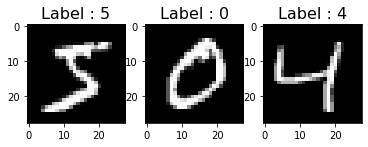

In [253]:
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.title("Label : {}".format(y_train[i]),fontsize=16)
plt.show()

5-Converting y_train and y_test from label to one-hot vector:

In [254]:
index = np.random.choice(len(y_test))
print('Random element of y_train and y_test in raw format: ',y_train[index],y_test[index])
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)
print('Random element of y_train and y_test after change: ',y_train[index],y_test[index])

Random element of y_train and y_test in raw format:  9 2
Random element of y_train and y_test after change:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


6-Normalizing x_train and x_test from 0-255 input values to 0-1:

In [255]:
print('random row vector of x_train and x_test in raw format:')
first_index, second_index = np.random.choice(len(x_test)), np.random.randint(10,20)
print(x_test[first_index,second_index],'\nand\n',x_train[first_index,second_index])
print('\n\nrandom row vector of x_train and x_test after normalization:')
x_test, x_train = x_test/255, x_train/255
print(x_test[first_index,second_index],'\nand\n',x_train[first_index,second_index])

random row vector of x_train and x_test in raw format:
[  0   0   0   0   0   0   0   0   0  73 108  77   0  10 180 252 235  46
   0   0   0   0   0   0   0   0   0   0] 
and
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  38 223 254   5   0   0   0   0   0]


random row vector of x_train and x_test after normalization:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.28627451 0.42352941 0.30196078
 0.         0.03921569 0.70588235 0.98823529 0.92156863 0.18039216
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ] 
and
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.14901961 0.8745098  0.99607843 0.01960784 0.
 0.         0.         0.         0.        ]


7-Reshaping x_train and x_test from 28x28 to 784x1 :

In [256]:
print('Before reshaping :',x_train.shape,x_test.shape)
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)
print('After reshaping :',x_train.shape,x_test.shape)

Before reshaping : (60000, 28, 28) (10000, 28, 28)
After reshaping : (60000, 784) (10000, 784)


8-Building neural network with 3 layers:

In [257]:
model = keras.Sequential()
model.add(Dense(units=128, input_shape=(784,),activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10,activation='softmax'))

9-Compiling model with passing loss function type, optimizer type and measured accuracy:

In [258]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 128)               100480    
                                                                 
 dense_49 (Dense)            (None, 128)               16512     
                                                                 
 dropout_16 (Dropout)        (None, 128)               0         
                                                                 
 dense_50 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


10-Training the model:

In [259]:
history = model.fit(x_train,y_train,validation_split=0.33,epochs=15,batch_size=512,verbose=1)

Epoch 1/15
79/79 [==============================] - 2s 15ms/step - loss: 0.7336 - accuracy: 0.7877 - val_loss: 0.2821 - val_accuracy: 0.9188
Epoch 2/15
79/79 [==============================] - 1s 12ms/step - loss: 0.2774 - accuracy: 0.9205 - val_loss: 0.2146 - val_accuracy: 0.9359
Epoch 3/15
79/79 [==============================] - 1s 14ms/step - loss: 0.2060 - accuracy: 0.9406 - val_loss: 0.1767 - val_accuracy: 0.9476
Epoch 4/15
79/79 [==============================] - 1s 12ms/step - loss: 0.1639 - accuracy: 0.9526 - val_loss: 0.1527 - val_accuracy: 0.9543
Epoch 5/15
79/79 [==============================] - 1s 13ms/step - loss: 0.1359 - accuracy: 0.9601 - val_loss: 0.1327 - val_accuracy: 0.9600
Epoch 6/15
79/79 [==============================] - 1s 12ms/step - loss: 0.1138 - accuracy: 0.9663 - val_loss: 0.1280 - val_accuracy: 0.9605
Epoch 7/15
79/79 [==============================] - 1s 12ms/step - loss: 0.0987 - accuracy: 0.9715 - val_loss: 0.1130 - val_accuracy: 0.9666
Epoch 8/15
79

11-Visualizing softmax approach:

In [260]:
y_predicted = model.predict(x_test)
print(y_predicted[0])
print('The highest prabablity is :',np.max(y_predicted[0]))

313/313 [==============================] - 1s 2ms/step
[1.7355623e-06 6.7640741e-07 8.5542699e-05 5.2730209e-04 2.1013827e-08
 2.2035358e-07 4.8815387e-08 9.9936712e-01 1.4579833e-06 1.5759801e-05]
The highest prabablity is : 0.9993671


12-Taking the max number(highest probablity) from every predicted y vector and replacing the whole vector with index of max:

In [261]:
final_y_predicted = np.argmax(y_predicted,axis=1)
print(final_y_predicted[0])

7


13-Checking a random test example:

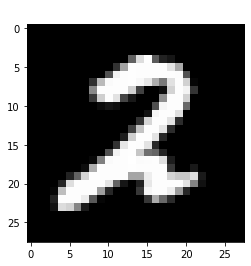

Certainty: % 99.93515014648438


In [262]:
index = np.random.choice(len(x_test))
plt.imshow(x_test[index].reshape(28,28),cmap='gray')
plt.title('True label: {},Predicted: {}'.format(y_test[index].argmax(),final_y_predicted[index]),color='white',fontsize=16)
plt.show()
print('Certainty: %',np.max(y_predicted[index])*100)

14-Evaluating the model:

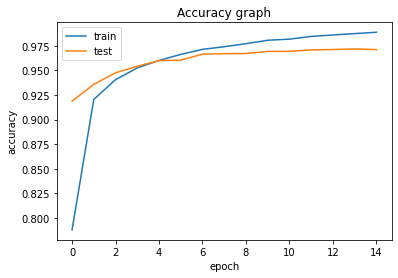

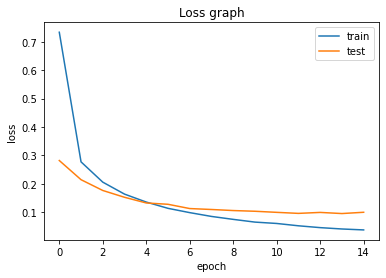

313/313 [==============================] - 1s 2ms/step - loss: 0.0852 - accuracy: 0.9745
Loss for test set:  0.08520986884832382
Accuracy for test set:  0.9745000004768372


In [263]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss for test set: ",test_loss)
print("Accuracy for test set: ",test_acc)